In [27]:
import re
import pandas as pd
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
file=open("chat.txt","r",encoding="utf-8")

In [3]:
data=file.read()

In [4]:
print(data)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages=re.split(pattern,data)[1:]

In [8]:
dates=re.findall(pattern,data)

In [9]:
df=pd.DataFrame({"user_message":messages,"message_date":dates})


In [10]:
dates

['01/10/2021, 13:18 - ',
 '01/10/2021, 13:18 - ',
 '01/10/2021, 20:30 - ',
 '01/10/2021, 20:30 - ',
 '01/10/2021, 20:30 - ',
 '01/10/2021, 20:30 - ',
 '01/10/2021, 20:42 - ',
 '01/10/2021, 22:09 - ',
 '01/10/2021, 22:09 - ',
 '01/10/2021, 22:11 - ',
 '01/10/2021, 22:11 - ',
 '01/10/2021, 22:28 - ',
 '02/10/2021, 11:39 - ',
 '02/10/2021, 11:39 - ',
 '02/10/2021, 11:39 - ',
 '02/10/2021, 11:39 - ',
 '03/10/2021, 01:35 - ',
 '03/10/2021, 09:14 - ',
 '03/10/2021, 18:24 - ',
 '03/10/2021, 20:21 - ',
 '03/10/2021, 20:21 - ',
 '04/10/2021, 05:50 - ',
 '04/10/2021, 05:51 - ',
 '04/10/2021, 06:28 - ',
 '04/10/2021, 06:28 - ',
 '04/10/2021, 09:21 - ',
 '04/10/2021, 09:21 - ',
 '04/10/2021, 09:22 - ',
 '04/10/2021, 09:33 - ',
 '04/10/2021, 09:33 - ',
 '04/10/2021, 09:34 - ',
 '04/10/2021, 09:36 - ',
 '04/10/2021, 09:50 - ',
 '04/10/2021, 09:50 - ',
 '04/10/2021, 09:57 - ',
 '04/10/2021, 09:57 - ',
 '04/10/2021, 09:57 - ',
 '04/10/2021, 09:57 - ',
 '04/10/2021, 09:58 - ',
 '04/10/2021, 09:58 - ',


In [11]:
df.head()

,user_message,message_date
0,Lakshay: 🥲🥲🥲\n,"01/10/2021, 13:18 -"
1,Lakshay: <Media omitted>\n,"01/10/2021, 13:18 -"
2,Ayush Sharma: Pakka bta\n,"01/10/2021, 20:30 -"
3,Ayush Sharma: Aaj tak ek to gya nai humare sath\n,"01/10/2021, 20:30 -"
4,Ayush Sharma: Abe shang chi pta ni kab dekhi t...,"01/10/2021, 20:30 -"


In [12]:
df["message_date"]=pd.to_datetime(df["message_date"], format='%d/%m/%Y, %H:%M - ' )

In [13]:
df.rename(columns={"message_date":"date"},inplace=True)

In [14]:
df.head()

,user_message,date
0,Lakshay: 🥲🥲🥲\n,2021-10-01 13:18:00
1,Lakshay: <Media omitted>\n,2021-10-01 13:18:00
2,Ayush Sharma: Pakka bta\n,2021-10-01 20:30:00
3,Ayush Sharma: Aaj tak ek to gya nai humare sath\n,2021-10-01 20:30:00
4,Ayush Sharma: Abe shang chi pta ni kab dekhi t...,2021-10-01 20:30:00


In [15]:
df.shape

(39999, 2)

In [16]:
users=[]
messages=[]
for message in df["user_message"]:
   entry = re.split('([\w\W]+?):\s', message)
   if entry[1:]:  # user name
       users.append(entry[1])
       messages.append(" ".join(entry[2:]))
   else:
       users.append('group_notification')
       messages.append(entry[0])

In [17]:
df["user"]=users
df["message"]=messages

In [18]:
df.head()

,user_message,date,user,message
0,Lakshay: 🥲🥲🥲\n,2021-10-01 13:18:00,Lakshay,🥲🥲🥲\n
1,Lakshay: <Media omitted>\n,2021-10-01 13:18:00,Lakshay,<Media omitted>\n
2,Ayush Sharma: Pakka bta\n,2021-10-01 20:30:00,Ayush Sharma,Pakka bta\n
3,Ayush Sharma: Aaj tak ek to gya nai humare sath\n,2021-10-01 20:30:00,Ayush Sharma,Aaj tak ek to gya nai humare sath\n
4,Ayush Sharma: Abe shang chi pta ni kab dekhi t...,2021-10-01 20:30:00,Ayush Sharma,Abe shang chi pta ni kab dekhi thi yaad bhi na...


In [19]:
 df.drop(columns=['user_message'], inplace=True)

In [20]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute


In [24]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#df['message'] = df['message'].apply(remove_stop_words)
df_wc = wc.generate(df['message'].str.cat(sep=" "))
    

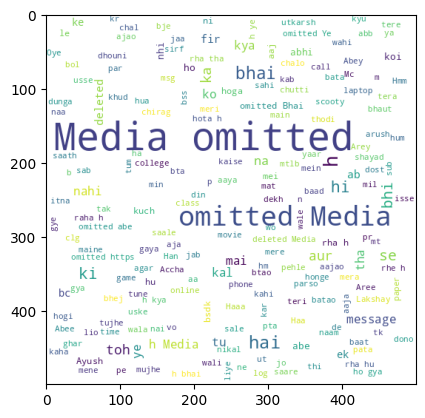

In [28]:
plt.imshow(df_wc)

In [ ]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2021-10-01 13:18:00,Lakshay,🥲🥲🥲\n,2021-10-01,2021,10,October,1,Friday,13,18
1,2021-10-01 13:18:00,Lakshay,<Media omitted>\n,2021-10-01,2021,10,October,1,Friday,13,18
2,2021-10-01 20:30:00,Ayush Sharma,Pakka bta\n,2021-10-01,2021,10,October,1,Friday,20,30
3,2021-10-01 20:30:00,Ayush Sharma,Aaj tak ek to gya nai humare sath\n,2021-10-01,2021,10,October,1,Friday,20,30
4,2021-10-01 20:30:00,Ayush Sharma,Abe shang chi pta ni kab dekhi thi yaad bhi na...,2021-10-01,2021,10,October,1,Friday,20,30


In [ ]:
timeline=df.groupby(["year","month_num","month"]).count()["message"].reset_index()


In [ ]:
time=[]
for i in range(timeline.shape[0]):
  print(str(timeline["month"][i])+"-"+str(timeline["year"][i]))

October-2021
November-2021
December-2021
January-2022
February-2022
March-2022
April-2022
May-2022


In [ ]:
timeline['time'] = pd.Series(time)

<ipython-input-51-d0cc956187e9>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  timeline['time'] = pd.Series(time)


In [ ]:
timeline

,year,month_num,month,message,time
0,2021,10,October,1628,NaN
1,2021,11,November,1708,NaN
2,2021,12,December,3847,NaN
3,2022,1,January,3131,NaN
4,2022,2,February,3794,NaN
5,2022,3,March,2218,NaN
6,2022,4,April,2910,NaN
7,2022,5,May,1083,NaN


In [ ]:
df["user"].unique().tolist()

['Lakshay',
 'Ayush Sharma',
 'Himansu',
 'Arush',
 'Utkarsh',
 'group_notification',
 'Dhouni']

In [ ]:
#df=round((df["user"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"index":"name","user":"percent"})

In [ ]:
#df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        #columns={'index': 'name', 'user': 'percent'})

In [ ]:
#df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index()

In [ ]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2021-10-01 13:18:00,Lakshay,🥲🥲🥲\n,2021-10-01,2021,10,October,1,Friday,13,18
1,2021-10-01 13:18:00,Lakshay,<Media omitted>\n,2021-10-01,2021,10,October,1,Friday,13,18
2,2021-10-01 20:30:00,Ayush Sharma,Pakka bta\n,2021-10-01,2021,10,October,1,Friday,20,30
3,2021-10-01 20:30:00,Ayush Sharma,Aaj tak ek to gya nai humare sath\n,2021-10-01,2021,10,October,1,Friday,20,30
4,2021-10-01 20:30:00,Ayush Sharma,Abe shang chi pta ni kab dekhi thi yaad bhi na...,2021-10-01,2021,10,October,1,Friday,20,30
...,...,...,...,...,...,...,...,...,...,...,...
39994,2023-04-12 22:55:00,Dhouni,<Media omitted>\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39995,2023-04-12 22:55:00,Himansu,Myao\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39996,2023-04-12 22:55:00,Himansu,Mayo\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39997,2023-04-12 23:02:00,Lakshay,<Media omitted>\n,2023-04-12,2023,4,April,12,Wednesday,23,2


In [ ]:
#df.rename(columns = {'index':'name', 'user':'percent'}, inplace = True)

In [ ]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2021-10-01 13:18:00,Lakshay,🥲🥲🥲\n,2021-10-01,2021,10,October,1,Friday,13,18
1,2021-10-01 13:18:00,Lakshay,<Media omitted>\n,2021-10-01,2021,10,October,1,Friday,13,18
2,2021-10-01 20:30:00,Ayush Sharma,Pakka bta\n,2021-10-01,2021,10,October,1,Friday,20,30
3,2021-10-01 20:30:00,Ayush Sharma,Aaj tak ek to gya nai humare sath\n,2021-10-01,2021,10,October,1,Friday,20,30
4,2021-10-01 20:30:00,Ayush Sharma,Abe shang chi pta ni kab dekhi thi yaad bhi na...,2021-10-01,2021,10,October,1,Friday,20,30
...,...,...,...,...,...,...,...,...,...,...,...
39994,2023-04-12 22:55:00,Dhouni,<Media omitted>\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39995,2023-04-12 22:55:00,Himansu,Myao\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39996,2023-04-12 22:55:00,Himansu,Mayo\n,2023-04-12,2023,4,April,12,Wednesday,22,55
39997,2023-04-12 23:02:00,Lakshay,<Media omitted>\n,2023-04-12,2023,4,April,12,Wednesday,23,2


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
df_wc = wc.generate(df['message'].str.cat(sep=" "))

In [ ]:
import matplotlib.pyplot as plt

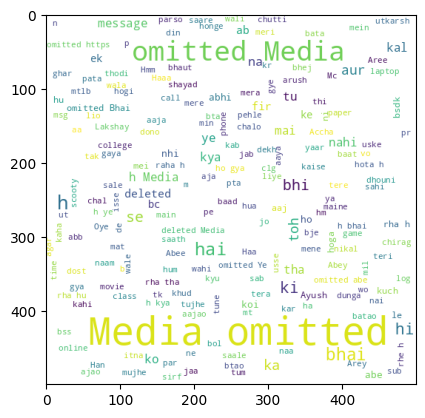

In [ ]:

fig, ax = plt.subplots()
ax.imshow(wc)

In [ ]:
df['message'].str.cat(sep=" ")

'🥲🥲🥲\n <Media omitted>\n Pakka bta\n Aaj tak ek to gya nai humare sath\n Abe shang chi pta ni kab dekhi thi yaad bhi nai hai\n Na tumhare ghar me hoga yaad\n <Media omitted>\n Bhai 3 october k baad chalenge\n Jaha bhi chalna ho\n Ext chl rhe h 👀\n Uninave Society\n I am down\n https://www.flipkart.com/akg-k52-closed-back-wired-without-mic-headset/p/itmde9a866212f7a?pid=ACCFT4BFSQKMHRRA&affid=hello19th&affExtParam1=P-300/ASDG&affid=hello19th&affExtParam1=KAM-01001/M7P&affExtParam2=ENKR20211002A95849859\n Bisi 800 me bus\n 🔥🔥🔥\n Akg ke geadphone\n 4 ko chloge ya 5 ko?\n 5\n Ok\n Koi black squirt khelega??\n Squad*\n This message was deleted\n <Media omitted>\n 16-18 k beech mera license aajaayga\n Fir chalenge kahi ... Mein car le aaunga\n <Media omitted>\n Tumhe lagta hai ye bacha gaadi chala skta hai\n <Media omitted>\n Haa kal bhai ne bataya\n Oyee suno\n Tc aur marksheet kab lene jaaoge?\n Kal\n abe kya scene hai ghar walo ke sign to nai honge na?\n marksheet p\n Kal 11 chalenge\n Ga

In [ ]:
df['message']

0                                                    🥲🥲🥲\n
1                                        <Media omitted>\n
2                                              Pakka bta\n
3                      Aaj tak ek to gya nai humare sath\n
4        Abe shang chi pta ni kab dekhi thi yaad bhi na...
                               ...                        
39994                                    <Media omitted>\n
39995                                               Myao\n
39996                                               Mayo\n
39997                                    <Media omitted>\n
39998           Bhai yrr batane ko mana kra tha firr bhi\n
Name: message, Length: 39999, dtype: object

In [ ]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()


temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']


def remove_stop_words(message):
    y = []
    for word in message.lower().split():
        if word not in stop_words:
            y.append(word)
    return " ".join(y)



temp['message'] = temp['message'].apply(remove_stop_words)


In [ ]:
temp['message']

0                        🥲🥲🥲
2                  pakka bta
3                 gya humare
4              shang chi pta
5                           
                ...         
39992       bn jaegi lakshay
39993      soya bean lakshay
39995                   myao
39996                   mayo
39998    yrr batane kra firr
Name: message, Length: 29977, dtype: object

In [ ]:
pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emoji

In [ ]:
emojis=[]
for message in df['message']:
  for c in message:
    if c in emoji.UNICODE_EMOJI['en']:
      emojis.append(c)
  

AttributeError: ignored

In [ ]:
  for message in df['message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [ ]:
emojis

['🥲',
 '🥲',
 '🥲',
 '👀',
 '🔥',
 '🔥',
 '🔥',
 '👍',
 '🥲',
 '🥲',
 '🥲',
 '🥲',
 '🥲',
 '🥲',
 '👍',
 '🤣',
 '🤣',
 '🤣',
 '🙃',
 '🙂',
 '🙂',
 '🙃',
 '🤣',
 '🤣',
 '😭',
 '😭',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '🤣',
 '😎',
 '🥲',
 '🥲',
 '🙃',
 '🥱',
 '😎',
 '😎',
 '😎',
 '😋',
 '😋',
 '😋',
 '🤣',
 '😣',
 '😣',
 '😦',
 '🙁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🥺',
 '😅',
 '😏',
 '😏',
 '🤣',
 '😂',
 '🤣',
 '🤣',
 '🤣',
 '🥲',
 '🥲',
 '🥲',
 '🙃',
 '😭',
 '🤨',
 '🤨',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '🙏',
 '🥲',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🥲',
 '🥲',
 '🥲',
 '🤣',
 '🤣',
 '👀',
 '🙂',
 '🙂',
 '🙂',
 '🙂',
 '🙂',
 '🤣',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '🤣',
 '😂',
 '😂',
 '🔥',
 '🔥',
 '🤣',
 '👀',
 '🥲',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🥺',
 '😭',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '👍',
 '🙏',
 '😇',
 '😔',
 '🤩',
 '🤩',
 '🤩',
 '😮',
 '😮',
 '😮',
 '😮',
 '😮',
 '😮',
 '😵',
 '😵',
 '😵',
 '🤩',
 '🤩',
 '🔥'